# Lecture 20: Introduction to Natural Language Processing

### Please note: This lecture will be recorded and made available for viewing online. If you do not wish to be recorded, please adjust your camera settings accordingly. 

# Reminders/Announcements:
- Assignment 7 due tomorrow at 8pm Pacific
- Quiz 2 is being graded
- More Final Project details have been pushed out
- Lots of banking fraud recently, maybe check your accounts 

## What is Natural Language Processing?

Natural Language Processing revolves around using computational or statistical techniques to study human language. Subtopics of interest include:
- Stylometry: Who wrote what? -> Not James Patterson...
- Machine Translation: Hola, cómo estás? -> Hi, how are you?
- Sentiment Analysis: "That movie was awesome!" -> Positive
- Question Answering: "Where was Barack Obama born?" -> Hawaii
- Personal Assistants: "Hey Siri, find me a gas station" -> List of gas stations near you

Before we go into any details regarding NLP, it's worth discussing *the difficulties* of the field. To get you started thinking about this, let's make this a participation check:

## ****** Participation Check ******************************
In this markdown cell list at least two *difficulties* that you think would arise in natural language processing; consider questions such as:
- what parts of human language would be most difficult for computers to "understand" and why? 
- what words/types of words would be difficult for a computer to "understand" and why?

Answer here:

- RED: Color, angry, undercooked (raw)
- CLIP: To cut apart, to put together
## **************************************************************



Let's start with some of the earlier notions of NLP, which relied on statistical analysis of texts. A nice introduction to this is the following blog post of Justin Rice: https://www.litcharts.com/blog/analitics/what-makes-hemingway/ , which explores the writings of Ernest Hemingway. 

## Stylometry: The Basics

How can you analyze writings systematically? Here are some basic questions you can ask (I have informally split this up into two categories; this is not a hard and fast rule):
- Structural questions:
    - How long are your sentences? 10 words? 20 words?
    - What type of voice are you writing in? Active? Passive? First Person? Third Person?
    - How long are the words in your sentences? 5 letters? 10 letters?
    - What punctuation do you use?
- Stylistic questions:
    - What words are you using? 
    - What are you writing about?
    - What emotions are you invoking? 

Here are some observations about Hemingway's writing, taken from the above blog post of Justin Rice.

Hemingway uses (relatively) short sentences:

<img src="hway1.png" alt="drawing" width="500"/>

Hemingway uses (relatively) short words:

<img src="hway2.png" alt="drawing" width="700"/>

Hemingway uses relatively few nouns, but a lot of adverbs and pronouns:

<img src="hway3.png" alt="drawing" width="500"/>

The following words are "distinctly" Hemingwayesque (with a loose definition of distinctly)

<img src="hway4.png" alt="drawing" width="500"/>

Let's do some of this analysis on our own!

## The Federalist Papers

Brief history lesson: In the 1780's, a bunch of old dudes were trying to create a new government for America. There were two camps: Federalists and Anti-Federalists. 
- Federalists wanted *more central (federal) powers*
- Anti-Federalists wanted *less central (federal) powers*

Alexander Hamilton, James Madison, and John Jay were three notable Federalists; they wrote a series of papers in favor of central governance: The Federalist Papers. There were 85 such papers. Originally they were written anonymously under the pen name "Publius." Later it turned out that:
- Hamilton *probably* wrote 51 of the papers
- Madison *probably* wrote 15 of the papers
- Jay *probably* wrote 5 of the papers
- Hamilton and Madison *probably jointly* wrote 3 of the papers
- This leaves 11 papers which are *disputed*.

The estate of Hamilton claimed that Hamilton had written these 11 papers; the estate of Madison challenged these claims. Jay *definitely did not* write the papers.

Can we apply statistics to figure out who was correct?

In [1]:
import json
papers = []
with open('federalist.json', 'r') as f:
    for line in f:
        papers.append(json.loads(line))
papers[0]

{'author': 'HAMILTON',
 'text': 'To the People of the State of New York:\n\nAFTER an unequivocal experience of the inefficacy of the\nsubsisting federal government, you are called upon to deliberate on\na new Constitution for the United States of America. The subject\nspeaks its own importance; comprehending in its consequences\nnothing less than the existence of the UNION, the safety and welfare\nof the parts of which it is composed, the fate of an empire in many\nrespects the most interesting in the world. It has been frequently\nremarked that it seems to have been reserved to the people of this\ncountry, by their conduct and example, to decide the important\nquestion, whether societies of men are really capable or not of\nestablishing good government from reflection and choice, or whether\nthey are forever destined to depend for their political\nconstitutions on accident and force. If there be any truth in the\nremark, the crisis at which we are arrived may with propriety be\nregard

In [2]:
authors = {}
for paper in papers:
    authors[paper['author']] = []
authors

{'HAMILTON': [],
 'JAY': [],
 'MADISON': [],
 'HAMILTON AND MADISON': [],
 'HAMILTON OR MADISON': []}

In [3]:
for paper in papers:
    authors[paper['author']].append(paper['text'])
for key in authors:
    print(key,len(authors[key]))

HAMILTON 51
JAY 5
MADISON 15
HAMILTON AND MADISON 3
HAMILTON OR MADISON 11


In [4]:
authors['MADISON'][0][:127]

'To the People of the State of New York:\n\nAMONG the numerous advantages promised by a wellconstructed\nUnion, none deserves to be'

To study these papers we will use the *Natural Language ToolKit* (NLTK). This is an open source package for NLP, based on Python.

In [5]:
import nltk

The first tool we will use is NLTK's *tokenize* method:

In [6]:
madison = []
for paper in authors['MADISON']:
    madison+=nltk.word_tokenize(paper)
madison[:20]

['To',
 'the',
 'People',
 'of',
 'the',
 'State',
 'of',
 'New',
 'York',
 ':',
 'AMONG',
 'the',
 'numerous',
 'advantages',
 'promised',
 'by',
 'a',
 'wellconstructed',
 'Union',
 ',']

Be careful! Tokenize works a bit different than we might expect:

In [7]:
nltk.word_tokenize("can't")

['ca', "n't"]

Let's throw away the punctuation for now (you might not always want to do this!)

In [8]:
madison = [word for word in madison if any(c.isalpha() for c in word)]
madison[:20]

['To',
 'the',
 'People',
 'of',
 'the',
 'State',
 'of',
 'New',
 'York',
 'AMONG',
 'the',
 'numerous',
 'advantages',
 'promised',
 'by',
 'a',
 'wellconstructed',
 'Union',
 'none',
 'deserves']

What kind of words does Madison use? Long words? Short words?

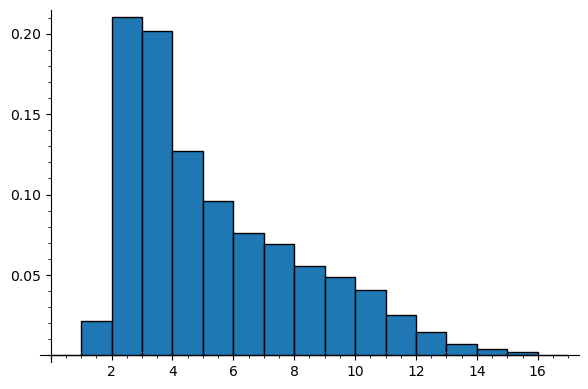

In [9]:
madisonLengths = [len(word) for word in madison]
histogram(madisonLengths, bins = [i for i in range(18)], density = True)

Here we start to see some of the traits of the English language; there are many short words which are used frequently: *it, is, the, and, they, us, our, but, ...*

So is this method useful at all? Let's take a look at John Jay's articles:

In [10]:
jay = []
for paper in authors['JAY']:
    jay+=nltk.word_tokenize(paper)
jay[:20]

['To',
 'the',
 'People',
 'of',
 'the',
 'State',
 'of',
 'New',
 'York',
 ':',
 'WHEN',
 'the',
 'people',
 'of',
 'America',
 'reflect',
 'that',
 'they',
 'are',
 'now']

In [11]:
jay = [word for word in jay if any(c.isalpha() for c in word)]
jay[:20]

['To',
 'the',
 'People',
 'of',
 'the',
 'State',
 'of',
 'New',
 'York',
 'WHEN',
 'the',
 'people',
 'of',
 'America',
 'reflect',
 'that',
 'they',
 'are',
 'now',
 'called']

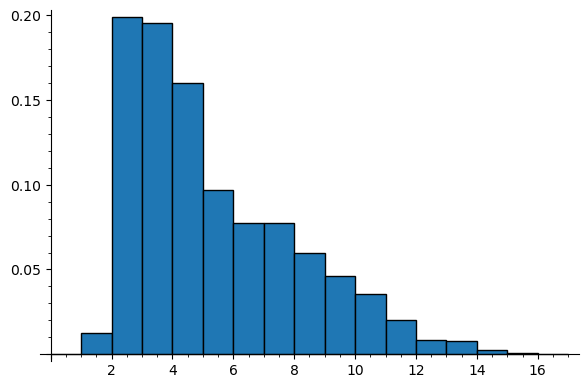

In [12]:
jayLengths = [len(word) for word in jay]
histogram(jayLengths, bins = [i for i in range(18)], density = True)

Hmmm...Let's try to superpose the plots together:

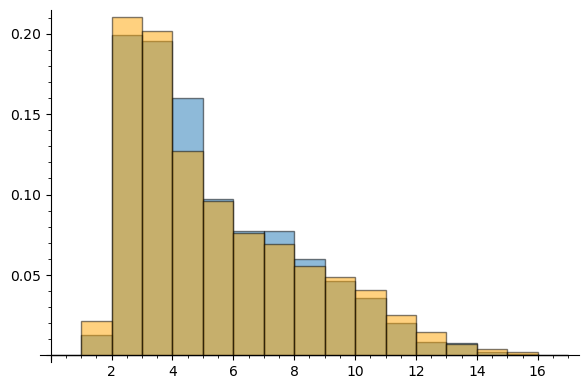

In [13]:
histogram(jayLengths, bins = [i for i in range(18)], density = True, alpha = .5)+histogram(madisonLengths, bins = [i for i in range(18)], density = True, color = 'orange', alpha = .5)

## ******** Participation Check**************************

Repeat the same analysis above to create a list `unknownLengths` of the lengths of the words used in the disputed Federalist papers. Remember; the disputed papers are located in `authors["HAMILTON OR MADISON"]`. Don't forget to remove the punctuation! 

Then plot two histograms as above:
- The first one consisting of *both the unknownLengths and the jayLengths*.
- The second one consisting of *both the unknownLengths and the madisonLengths*.

In [15]:
#Create unknownLengths here
unknown = []
for paper in authors['HAMILTON OR MADISON']:
    unknown+=nltk.word_tokenize(paper)
unknown = [word for word in unknown if any(c.isalpha() for c in word)]
unknownLengths = [len(word) for word in unknown]

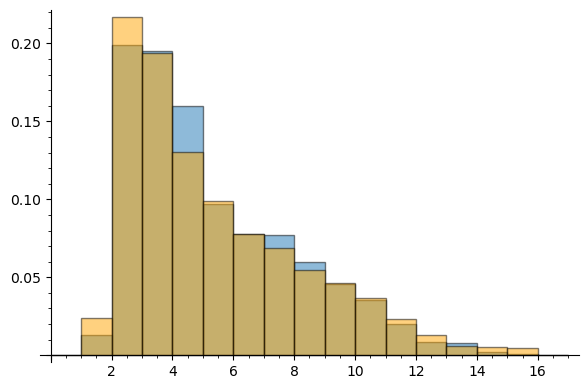

In [16]:
#plot histogram1 here
histogram(jayLengths, bins = [i for i in range(18)], density = True, alpha = .5)+histogram(unknownLengths, bins = [i for i in range(18)], density = True, color = 'orange', alpha = .5)

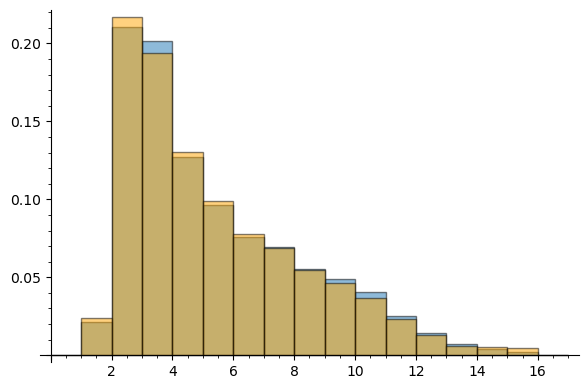

In [17]:
#plot histogram2 here
histogram(madisonLengths, bins = [i for i in range(18)], density = True, alpha = .5)+histogram(unknownLengths, bins = [i for i in range(18)], density = True, color = 'orange', alpha = .5)

## *******************************************************

It certainly looks like the author was *not* John Jay! This is a good start...although we already knew Jay wasn't the author! Unfortunately this does not distinguish Hamilton and Madison...

In [18]:
hamilton = []
for paper in authors['HAMILTON']:
    hamilton+=nltk.word_tokenize(paper)
hamiltonLengths = [len(word) for word in hamilton if any(c.isalpha() for c in word)]

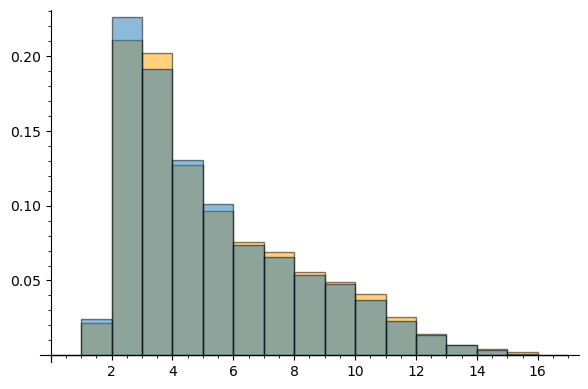

In [19]:
histogram(madisonLengths, bins = [i for i in range(18)], density = True, color = 'orange', alpha = .5)+histogram(hamiltonLengths, bins = [i for i in range(18)], density = True ,alpha = .5)

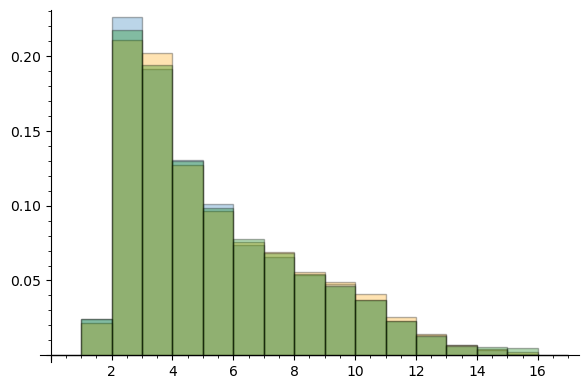

In [21]:
histogram(hamiltonLengths, bins = [i for i in range(18)], density = True, alpha = .3)+histogram(madisonLengths, bins = [i for i in range(18)], density = True, color = 'orange', alpha = .3)+histogram(unknownLengths, bins = [i for i in range(18)], density = True, color = 'green', alpha = .3)

Unfortunately it doesn't seem like words will be able to distinguish the two...

## Sentence Lengths

Let's try the same analysis, but for *sentence lengths* to see if we can distinguish Madison from Hamilton...

In [22]:
madison = []
for paper in authors['MADISON']:
    madison+=nltk.sent_tokenize(paper)
madison[:5]

['To the People of the State of New York:\n\nAMONG the numerous advantages promised by a wellconstructed\nUnion, none deserves to be more accurately developed than its\ntendency to break and control the violence of faction.',
 'The friend\nof popular governments never finds himself so much alarmed for their\ncharacter and fate, as when he contemplates their propensity to this\ndangerous vice.',
 'He will not fail, therefore, to set a due value on\nany plan which, without violating the principles to which he is\nattached, provides a proper cure for it.',
 'The instability,\ninjustice, and confusion introduced into the public councils, have,\nin truth, been the mortal diseases under which popular governments\nhave everywhere perished; as they continue to be the favorite and\nfruitful topics from which the adversaries to liberty derive their\nmost specious declamations.',
 'The valuable improvements made by the\nAmerican constitutions on the popular models, both ancient and\nmodern, canno

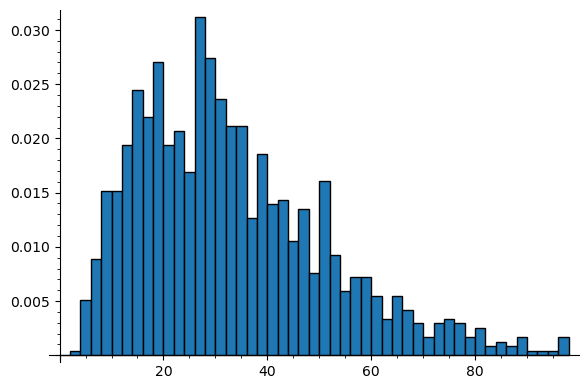

In [23]:
madisonLengths = [len(item.split()) for item in madison if len(item.split())>2]
histogram(madisonLengths, bins = [2*i for i in range(50)], density = True)

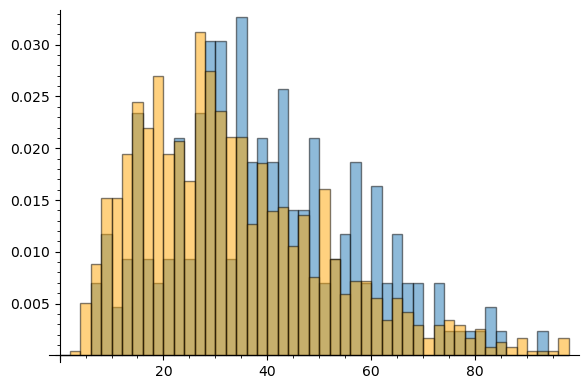

In [24]:
jay = []
for paper in authors['JAY']:
    jay+=nltk.sent_tokenize(paper)
jayLengths = [len(item.split()) for item in jay if len(item.split())>2]
histogram(jayLengths, bins = [2*i for i in range(50)], density = True,alpha = .5)+histogram(madisonLengths, bins = [2*i for i in range(50)], density = True, alpha = .5, color = 'orange')

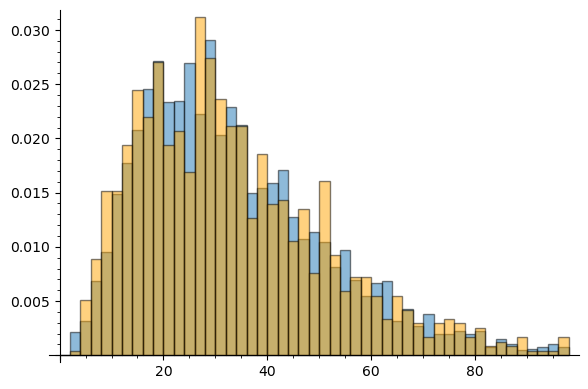

In [25]:
hamilton = []
for paper in authors['HAMILTON']:
    hamilton+=nltk.sent_tokenize(paper)
hamiltonLengths = [len(item.split()) for item in hamilton if len(item.split())>2]
histogram(hamiltonLengths, bins = [2*i for i in range(50)], density = True,alpha = .5)+histogram(madisonLengths, bins = [2*i for i in range(50)], density = True, alpha = .5, color = 'orange')

In [26]:
print(float(mean(hamiltonLengths)))
print(float(mean(madisonLengths)))
print(float(mean(jayLengths)))

33.82798921186695
34.01162790697674
39.13023255813953


In [27]:
print(float(std(hamiltonLengths)))
print(float(std(madisonLengths)))
print(float(std(jayLengths)))

20.003306574742712
21.272913658819274
18.494044695468876


No luck here either!

## Marker Words

Another comparison point that we can use is the type of words that appear in each paper, and the frequency with which they appear. First, we should probably *standardize* the words:

In [28]:
sentence = 'Blue is my favorite color; I really love blue.'
nltk.word_tokenize(sentence)

['Blue',
 'is',
 'my',
 'favorite',
 'color',
 ';',
 'I',
 'really',
 'love',
 'blue',
 '.']

Thankfully Python makes this easy!

In [29]:
[word.lower() for word in nltk.word_tokenize(sentence)]

['blue',
 'is',
 'my',
 'favorite',
 'color',
 ';',
 'i',
 'really',
 'love',
 'blue',
 '.']

Ok. Let's extract *all of the words that were used in the Federalist papers*:

In [30]:
language = set()
for author in authors:
    for paper in authors[author]:
        for word in nltk.word_tokenize(paper):
            language.add(word.lower())
len(language)

8780

In [31]:
'frog' in language

False

In [32]:
'america' in language

True

Now we will count *how many times Madison used a specific word*

In [33]:
madisonCounts = {word:0 for word in language}
for paper in authors['MADISON']:
    for word in nltk.word_tokenize(paper):
        madisonCounts[word.lower()]+=1

In [34]:
madisonCounts['america']

30

Similarly for Hamilton

In [35]:
hamiltonCounts = {word:0 for word in language}
for paper in authors['HAMILTON']:
    for word in nltk.word_tokenize(paper):
        hamiltonCounts[word.lower()]+=1

In [36]:
hamiltonCounts['america']

46

Be careful! We better remember that Hamilton wrote many more papers than Madison did:

In [37]:
sum(madisonCounts.values())

45765

In [38]:
sum(hamiltonCounts.values())

125678

This leads to the concept of a *word rate*: the word rate of $w$ is:
$$
rate(w) = \frac{\text{number of times w was used in a group of text}}{\text{total number of words in that group of text}}
$$

In [39]:
madisonRates = {word:float(madisonCounts[word]/45765) for word in language}
hamiltonRates = {word:float(hamiltonCounts[word]/125678) for word in language}

In [40]:
madisonRates['america']

0.0006555227794165847

In [41]:
hamiltonRates['america']

0.0003660147360715479

Ok! Let's start looking at the *most common* words that each author uses:

In [42]:
madWords = sorted([w for w in madisonCounts], key = lambda x: madisonCounts[x] , reverse = True)
madWords[:10]

['the', ',', 'of', 'to', 'and', '.', 'in', 'a', 'be', 'that']

In [43]:
hamWords = sorted([w for w in hamiltonCounts], key = lambda x: hamiltonCounts[x] , reverse = True)
hamWords[:10]

['the', ',', 'of', 'to', '.', 'in', 'and', 'a', 'be', 'that']

That was boring!!! 

We can try and go through this list to find a set of *marker words*. A *marker word* is a word which has *a high rate with respect to one author* but a *low rate with respect to another author*:

In [44]:
markers =['on','upon','while','whilst']

In [45]:
[round(hamiltonRates[word], 6) for word in markers]

[0.003016, 0.002976, 0.000286, 8e-06]

In [47]:
[round(madisonRates[word], 6) for word in markers]

[0.006839, 0.000153, 0.0, 0.000262]

How could we go about looking for these? Often marker words come from prior knowledge: an author in the 1700's probably used the word "rapscallion" much more than an author from current times. Another way is to simply do an exhaustive search:

In [48]:
for word in language:
    if madisonCounts[word]>100 and madisonRates[word]>2*hamiltonRates[word]:
        print(word)

on
federal
powers


In [49]:
for word in language:
    if hamiltonCounts[word]>100  and hamiltonRates[word]>2*madisonRates[word]:
        print(word)

courts
there
he
upon
man
men


In [50]:
for word in language:
    if madisonRates[word] and hamiltonRates[word] and madisonRates[word]>20*hamiltonRates[word]:
        print(word)

although
sphere
composing
whilst
coin


In [51]:
for word in language:
    if madisonRates[word] and hamiltonRates[word] and madisonRates[word]<1/20*hamiltonRates[word]:
        print(word)

kind


Ok. We've got a set of marker words; let's do a comparison to the disputed papers now:

In [52]:
unkCounts = {word:0 for word in language}
for paper in authors['HAMILTON OR MADISON']:
    for word in nltk.word_tokenize(paper):
        unkCounts[word.lower()]+=1
sum(unkCounts.values())

24441

In [53]:
unkRates = {word:unkCounts[word]/24441 for word in language}

In [54]:
markers = 'on,federal,powers,whilst,coin,sphere,composing,although,upon,there,courts,man,men,while'.split(',')

In [55]:
markers

['on',
 'federal',
 'powers',
 'whilst',
 'coin',
 'sphere',
 'composing',
 'although',
 'upon',
 'there',
 'courts',
 'man',
 'men',
 'while']

In [0]:
list_plot([madisonRates[w] for w in markers], legend_label = 'Madison', size = 30)+list_plot([hamiltonRates[w] for w in markers], color = 'green',legend_label = 'Hamilton', size = 30)

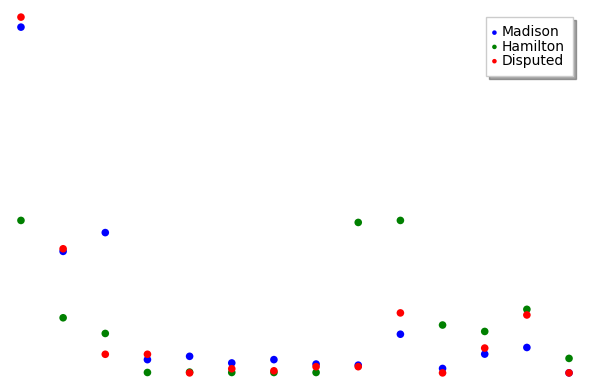

In [56]:
list_plot([madisonRates[w] for w in markers],size = 30,legend_label = 'Madison')+list_plot([hamiltonRates[w] for w in markers], color = 'green',size = 30, legend_label = 'Hamilton')+list_plot([unkRates[w] for w in markers], color = 'red', axes = False,size = 30, legend_label = 'Disputed')

It's a bit hard to say, but it looks like maybe blue is winning out here...

## Quantifying the Results

We can quantify our observations with various methods. One would be a *Chi Squared* test. A Chi Squared test is a statistical method for hypothesis testing. It basically "assigns a number" to the scatter plot above, by saying "if Madison actually wrote the disputed papers, how likely is it that his word usage would be this far off?" (This is a *very handwavy* explanation; see here for more: https://en.wikipedia.org/wiki/Chi-squared_test)

A higher tech version of this would be a *classifier algorithm*. The idea of a classifier algorithm is *similar* to the idea of a linear regression, but with a different end goal.

- Regression Model: feed data in, get a *numeric prediction* out
- Classifier Model: feed data in, get a *categorical prediction* out

In [57]:
print(markers)

['on', 'federal', 'powers', 'whilst', 'coin', 'sphere', 'composing', 'although', 'upon', 'there', 'courts', 'man', 'men', 'while']


Let's turn our *known data* into a *training set*. We can then *test* on the unknown papers to see what the computer thinks! To do this, we want to calculate the word rates *for each individual paper*, not for the author as a whole:

In [58]:
training = []
for paper in authors['MADISON']:
    counts = {word:0 for word in language}
    for word in nltk.word_tokenize(paper):
        counts[word.lower()]+=1
    total = sum(counts.values())
    training.append([float(0)]+[float(counts[word]/total) for word in markers])

In [59]:
print(training[0])

[0.0, 0.005365126676602086, 0.00029806259314456036, 0.0, 0.0, 0.0, 0.0005961251862891207, 0.0008941877794336811, 0.0, 0.0, 0.0017883755588673621, 0.0, 0.0008941877794336811, 0.0011922503725782414, 0.0]


In [60]:
for paper in authors['HAMILTON']:
    counts = {word:0 for word in language}
    for word in nltk.word_tokenize(paper):
        counts[word.lower()]+=1
    total = sum(counts.values())
    training.append([float(1)]+[float(counts[word]/total) for word in markers])

In [61]:
print(training[-1])

[1.0, 0.005897771952817824, 0.0, 0.000327653997378768, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003931847968545216, 0.00327653997378768, 0.0, 0.00163826998689384, 0.000982961992136304, 0.0]


In [62]:
import pandas as pd
df = pd.DataFrame(training)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.005365,0.000298,0.000000,0.000000,0.0,0.000596,0.000894,0.000000,0.000000,0.001788,0.000000,0.000894,0.001192,0.0
1,0.0,0.007176,0.000422,0.000000,0.000422,0.0,0.000422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.006319,0.000333,0.000665,0.000333,0.0,0.000000,0.000333,0.000333,0.000333,0.000665,0.000333,0.001330,0.001663,0.0
3,0.0,0.004054,0.001351,0.002973,0.000541,0.0,0.000000,0.000000,0.000541,0.001081,0.000811,0.000000,0.000541,0.001622,0.0
4,0.0,0.008463,0.007109,0.004062,0.000000,0.0,0.000339,0.001354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [63]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
61,1.0,0.003642,0.001821,0.000228,0.000228,0.0,0.0,0.0,0.0,0.002959,0.004325,0.006374,0.000228,0.001821,0.000455
62,1.0,0.000000,0.006932,0.000000,0.000000,0.0,0.0,0.0,0.0,0.002311,0.000000,0.015598,0.000000,0.000578,0.000000
63,1.0,0.002785,0.001083,0.000464,0.000000,0.0,0.0,0.0,0.0,0.003094,0.003403,0.004022,0.000155,0.001083,0.000619
64,1.0,0.004447,0.000424,0.001059,0.000000,0.0,0.0,0.0,0.0,0.002753,0.003600,0.000000,0.000212,0.001059,0.000212
65,1.0,0.005898,0.000000,0.000328,0.000000,0.0,0.0,0.0,0.0,0.003932,0.003277,0.000000,0.001638,0.000983,0.000000


## Here's a really stupid side comment...

using pandas in the SageMath kernel can be a bit obnoxious...

In [64]:
df[0]

KeyError: 0

In [65]:
df[int(0)]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
61    1.0
62    1.0
63    1.0
64    1.0
65    1.0
Name: 0, Length: 66, dtype: float64

pandas doesn't know how to use Sage integers, so it freaks out. You can fix this by calling "int" everywhere, or...

In [66]:
preparser(False)

Now life works:

In [0]:
df[0]

In [0]:
preparser(True)

In [0]:
type(0)

In [0]:
preparser(False)

In [0]:
type(0)

## Back to reality

Ok, we've got the data, the preparser is off, now what are these "classifiers" we're going to use?! The earliest classifiers people usually learn about come out of *logistic regressions* which some of you are doing for your final project, so I'll skip those! Here are three new classifiers which are "medium to advanced" level...
- Support Vector Machines: Find the "best" hyperplane which splits your data, and then classify points based on which side of the hyperplane they lie on
- Decision Trees: Ask a bunch of yes/no questions about the data and classify based on the answers
- Random Forests: Put a bunch of decision trees together and use "majority rules"

There is a lot to learn here which I will not really discuss; the important thing is that *even if you don't know what these are, you can use them fairly easily*

In [67]:
from sklearn import svm
clf = svm.SVC()

In [68]:
clf.fit(df[[i for i in range(1,15)]], df[0])

SVC()

In [69]:
clf.predict([df.iloc[4,1:]])

array([0.])

In [70]:
testing = []
for paper in authors['HAMILTON OR MADISON']:
    counts = {word:0 for word in language}
    for word in nltk.word_tokenize(paper):
        counts[word.lower()]+=1
    total = sum(counts.values())
    testing.append([float(counts[word]/total) for word in markers])
testdf = pd.DataFrame(testing)

In [71]:
testdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.008705,0.000000,0.001088,0.000544,0.0,0.000000,0.0,0.000000,0.000000,0.001088,0.0,0.001088,0.001088,0.0
1,0.008737,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000794,0.000794,0.000000,0.0,0.000000,0.001589,0.0
2,0.009882,0.002353,0.001412,0.000941,0.0,0.000941,0.0,0.000000,0.000000,0.001882,0.0,0.000471,0.001882,0.0
3,0.009197,0.003872,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,0.003303,0.003716,0.000000,0.000413,0.0,0.000000,0.0,0.000413,0.000000,0.000826,0.0,0.001239,0.000826,0.0


In [72]:
clf.predict(testdf)

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.])

It looks like the SVM thinks most of these were written by Madison!

How about the Decision Tree?

In [74]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(df[[i for i in range(1,15)]], df[0])

DecisionTreeClassifier(random_state=0)

In [75]:
clf.predict(testdf)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

The decision tree agrees!

What about the random forest?

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(df[[i for i in range(1,15)]], df[int(0)])

RandomForestClassifier(random_state=0)

In [77]:
clf.predict(testdf)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

From our preliminary analysis of marker words, it seems that *Madison* wrote the disputed Federalist Papers, not Hamilton. Cool!

## Time Permitting: Let's see how good Google is at human language!

## Next Time: Word Embeddings